Recall! You must copy this notebook to your own Drive before using!

# **Lab 10: Classification Introduction**


# How Classification Comes to Be...

- First, let's import the "credit" dataset by installing the ISLP module and learning how to load directly from our package...
  - [Link to package](https://github.com/intro-stat-learning/ISLP): Always research the packages you install!
  - [Documentation](https://intro-stat-learning.github.io/ISLP/datasets/Default.html) on how to use the ISLP package!

### Data Dictionary:

`default`: A factor with levels ‘No’ and ‘Yes’ indicating whether the customer defaulted on their debt

`student`: A factor with levels ‘No’ and ‘Yes’ indicating whether the customer is a student

`balance`: The average balance that the customer has remaining on their credit card after making their monthly payment

`income`: Income of customer

# Question 1

- pip install the ISLP package, restart your runtime, import the ISLP module, and load the "default" dataset as `default`.

In [ ]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.7/350.7 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.7/727.7 kB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 54.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 37.9 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=efe0456e6f16d4c7f31ad1d1b05ab7a3c31709ed2d0550d04b5c9c22be6736b3
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstall

# Question 2: Exploratory Data Analysis

- Plot a bar chart with the default data. The plot should be a histogram representing the count of defaults in the dataset on the x-axis

Here you are encouraged to use a new plotting library (it turns out there are many).

```python
import seaborn as sns

```

You are also allowed to use altair if you want.


*hint*: emulate [this](https://python-graph-gallery.com/20-basic-histogram-seaborn/) documentation with the `default` data in its stead, and the `"default"` column as the x variable.

<Axes: xlabel='default', ylabel='Count'>

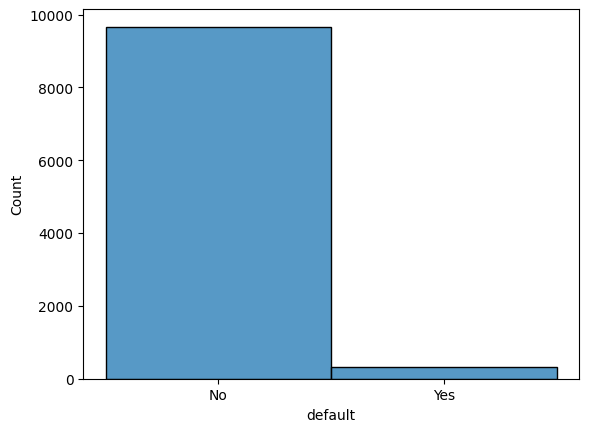

In [ ]:
# libraries & dataset
import seaborn as sns
from ISLP import load_data

default = load_data("Default")

sns.histplot(data=default, x="default")

# Question 3: Feature engineering

- clean the default data of such that both "default" and "student" are integers. "No" strings. should `map` to 0 and "Yes" strings should map to 1.

In [ ]:
mapping = {"No": 0, "Yes": 1}

default['student'] = default['student'].map(mapping).astype(int)
default['default'] = default['default'].map(mapping).astype(int)

In [ ]:
default.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [ ]:
default.iloc[0:1,:].values

array([['No', 'No', 729.5264952072861, 44361.62507426691]], dtype=object)

In [ ]:
sample = [0, 729.5264952072861, 44361.62507426691]
coeffs = [-0.8099, 0.0057, -0.0000003779]

In [ ]:
from math import exp
lin_reg_result = (0*-0.8099)+(0.0057*729.52)+(-0.0000003779*44361.62)
lin_reg_result

4.141499743802

In [ ]:
probability = exp(4.141499743802)/(exp(4.141499743802) +1)
probability

0.9843498326371568

In [ ]:
# Step 1: look at sign
# coefficient is positive means that increasing balance makes it more likely to default
# Step 2: find probability
# what's the probability? To know that, we take the exp(.0057) and then we can say
# step 3: intepret
# for every dollar increase in balance that makes default more likely by 1.0%.

1.0057162759095335

In [ ]:
"""
if the output probability is greater than .5 or equal to .5 then assign the classification 1.

If the probability is less than .5, then assign the classification 0.

.98 would be 1
"""

# Question 4: Logistic Regression

- import stats models and the "train_test_split" function from `sklearn`
- Assign `student` as the independent variable,  `default`  as the dependent variable.
- split the training and test data into 90% training, 10% test datasets. Don't forget to shuffle and set a random_seed number.
- add a constant to the X training set.
- Run and fit a `Logit` model on the training X and y data.
- print out the summary data of the fit.

# Question 5: Logistic Coefficient Interpretation

a). Is being a student statistically significant at the 5% level? Why or why not?

b). Based on what we talked about in class, what can we say about the student coefficient?  (**Major Hint**: Be very careful! Remember, we can't just read the coefficients outright!)

Here's some useful terminology: for every 1-unit increase in ____ there is expected to be a increase/decrease in ____ with an odds of _____
